The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


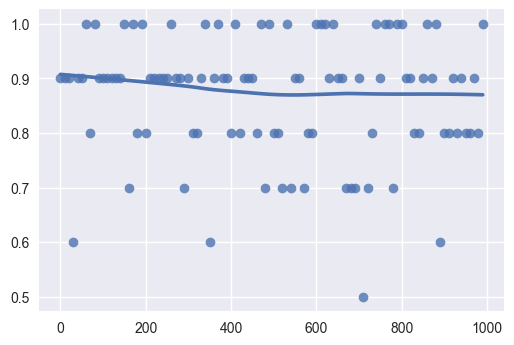

In [145]:
%load_ext autoreload
%autoreload 2
import deeptactoe
import numpy as np
from deeptactoe import game as g
from pprint import pprint as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

board=g.Board()
player1=g.Player(board,1)
player1.load_Q()
player2=g.Player(board,2,beh='random')
player2.load_Q()
board.start_game()
wins=[]
n_ep=1000
for episode in range(n_ep):
	board.clear()
	for i in range(6):
		action=player1.move()		
		player1.update_Q(action)
		player2.Q=player1.Q
		player1.update_epsilon(episode)
		board.update(action,1)	
		if(board.get_condition()<4): break	
		action=player2.move()
		board.update(action,2)		
		if(board.get_condition()<4): break
	if(episode%10==0):
		wins.append(g.run_trial(player1,10))
		player2.Q=player1.Q
player1.save_Q()

sns.regplot(np.arange(0,n_ep,10),np.array(wins),lowess=True,)


In [140]:
sns.regplot(np.arange(0,n_ep,101),np.array(wins),lowess=True,)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [113]:
len(player1.Q)

24463

In [24]:
board.update(player2.move(),2)

In [45]:
a=np.array([1,2,3])

In [46]:
np.setdiff1d(a,2)

array([1, 3])

In [111]:
np.any(np.equal(board.get_empty(),3))

False